In [1]:
import sys
import os

# Navigate up two levels from notebook to get to project root
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
src_path = os.path.abspath(os.path.join(notebook_dir, "../../src"))

if src_path not in sys.path:
    sys.path.append(src_path)

# Now import your functions from eda.py inside src
from PreProcessing import (
    process_data,
)
from visualization import (
    plot_feature_distributions,
)
from saveFile import (
    save_dataframe_to_csv,
)

In [2]:
data = process_data(r'C:\Users\ABC\Desktop\10Acadamy\Week 5\Credit-Risk-Probability-Model\data\processed\nan_null.xlsx')

## Feature Description

### Categorical Features

1. **ProviderId**:
   - **Unique Values**: 6 categories (e.g., `ProviderId_1`, `ProviderId_2`, etc.).
   - **Description**: Represents different service providers. Each category will be one-hot encoded to allow the model to treat them as distinct features without imposing any ordinal relationship.

2. **ProductId**:
   - **Unique Values**: 24 categories (e.g., `ProductId_1`, `ProductId_2`, etc.).
   - **Description**: Identifies specific products. Given the number of unique products, one-hot encoding is again appropriate to capture the presence or absence of each product.

3. **ProductCategory**:
   - **Unique Values**: 9 categories (e.g., `airtime`, `financial_services`, etc.).
   - **Description**: Represents broader categories of products. The relatively small number of categories makes one-hot encoding feasible.

4. **ChannelId**:
   - **Unique Values**: 5 categories (e.g., `ChannelId_1`, `ChannelId_2`, etc.).
   - **Description**: Indicates the channel through which the transaction was made. One-hot encoding will be used to convert these categories into binary features.

5. **PricingStrategy**:
   - **Unique Values**: 4 numerical categories (e.g., `0`, `1`, `2`, `4`).
   - **Description**: Represents different pricing strategies. Since these are numerical, they can be treated directly as numerical features or transformed to categorical if more context about their meaning is provided.

6. **FraudResult**:
   - **Unique Values**: Binary values `[0, 1]`.
   - **Description**: Indicates whether a transaction is fraudulent. This binary feature is suitable for direct use in modeling.

### Numerical Features

1. **Amount**:
   - **Description**: Represents the monetary value of the transaction. Given the presence of outliers, scaling (e.g., using `RobustScaler`) will be applied to normalize this feature while minimizing the influence of extreme values.

2. **Value**:
   - **Description**: Typically represents the absolute value of the `Amount`. This feature may be used in conjunction with `Amount` depending on the model's requirements.

3. **TransactionStartTime**:
   - **Description**: The timestamp marking when the transaction occurred. This feature will be converted to datetime format to extract meaningful components (e.g., hour, day, month, year) for further analysis.

### Summary of Processing Strategy
- **Categorical Features**: Will be transformed using One-Hot Encoding, allowing the model to interpret them correctly.
- **Numerical Features**: The `Amount` will be scaled using `RobustScaler` to handle outliers effectively, while `TransactionStartTime` will be transformed to extract relevant temporal features.

This structured approach ensures that all features are appropriately prepared for modeling, maximizing the model's ability to learn from the data.

## Pipeline Process Explanation

### Overview of the Pipeline
The pipeline is a systematic approach to data preprocessing that simplifies the workflow for preparing data for machine learning models. It allows us to chain together multiple steps, ensuring that transformations are applied consistently and efficiently.

### Components of the Pipeline

1. **Numerical Pipeline**:
   - **Imputer**: The `SimpleImputer` is used to handle missing values in numerical features. By setting the strategy to 'mean', this step fills in any missing values in the `Amount` column with the average of the existing values. This helps to maintain the overall data integrity and ensure that the model has complete information for training.
   
   - **Scaler**: The `RobustScaler` is employed to normalize the numerical data. This scaler is particularly useful when dealing with outliers, as it uses the median and the interquartile range (IQR) for scaling. This approach reduces the influence of extreme values on the scaled data, allowing the model to learn more effectively from the majority of observations.

2. **Categorical Pipeline**:
   - **Imputer**: Another instance of the `SimpleImputer` is used for categorical features, filling missing values with the most frequent category. This ensures that no data is lost and that the model can utilize all available information.
   
   - **One-Hot Encoder**: The `OneHotEncoder` is applied to convert categorical variables into a format suitable for machine learning algorithms. This method creates binary columns for each category, allowing the model to interpret the categorical data without imposing any ordinal relationships. Since the categorical variables have a maximum of 9 unique values, One-Hot Encoding is efficient and effective.

### Combination of Pipelines
- The `ColumnTransformer` combines the numerical and categorical pipelines into a single preprocessing step. This ensures that each feature type is transformed appropriately:
  - Numerical features are imputed and scaled.
  - Categorical features are imputed and one-hot encoded.

### Benefits of Using a Pipeline
- **Consistency**: Ensures that the same preprocessing steps are applied to both training and testing data.
- **Efficiency**: Streamlines the workflow, allowing for easy adjustments and reusability of the preprocessing steps.
- **Simplification**: Reduces the complexity of the code, making it easier to read and maintain.

In summary, the use of a pipeline encapsulates the entire preprocessing process, ensuring that the data is clean, normalized, and ready for machine learning models.

## Feature Engineering Steps

In this section, we outline the aggregate features created to enhance the dataset for better analysis and machine learning modeling.

### Aggregate Features Created

1. **Net Total Transaction Amount**:
   - **Description**: This feature calculates the net transaction amount for each customer by summing all debits and credits. It provides insight into the overall cash flow for each customer.

2. **Gross Transaction Amount**:
   - **Description**: This computes the total gross amount of transactions (absolute values) for each customer. It helps in understanding the total volume of transactions regardless of their direction.

3. **Average Transaction Amount**:
   - **Description**: This feature determines the average transaction amount for each customer, providing insight into typical spending behavior.

4. **Transaction Count**:
   - **Description**: This counts the number of transactions for each customer. It indicates customer engagement and activity levels.

5. **Standard Deviation of Transaction Amounts**:
   - **Description**: This feature calculates the standard deviation of transaction amounts for each customer. It assesses the variability in spending, which can be a risk factor in credit scoring.

6. **Last Transaction Date**:
   - **Description**: This identifies the date of the most recent transaction for each customer, which is useful for understanding customer engagement.

7. **Recency**:
   - **Description**: This measures the number of days since the last transaction. It helps assess how recently a customer has engaged with the platform, which is important for predicting future behavior.

### Summary
These features enhance the dataset by providing insights into customer behavior, transaction patterns, and engagement levels. They are critical for building a robust model that can effectively assess credit risk and customer value.

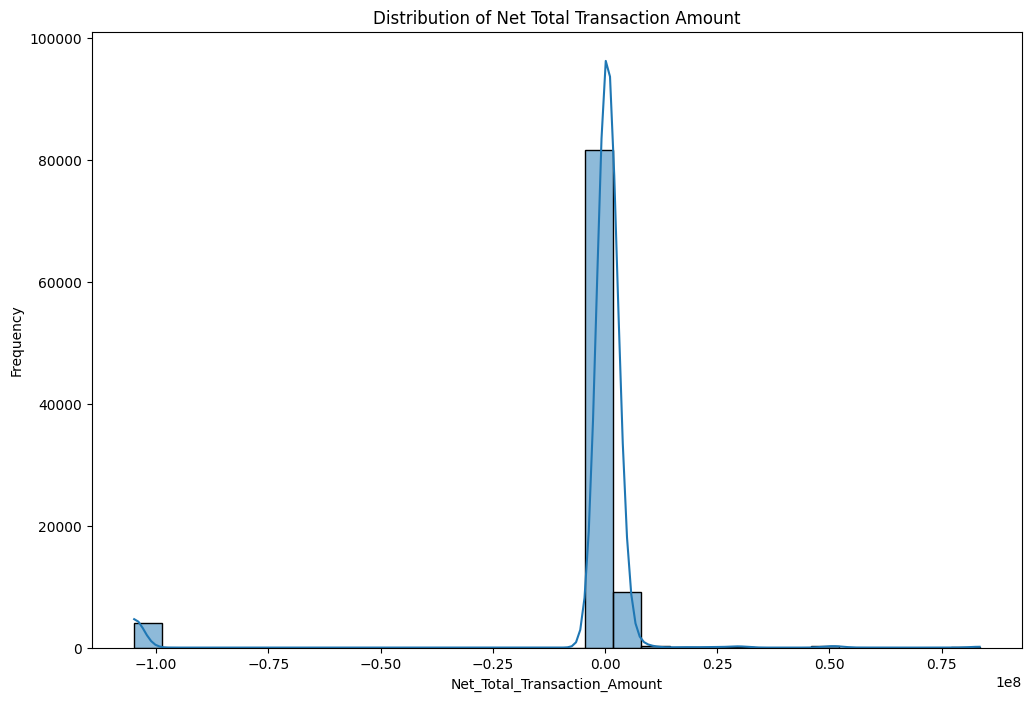

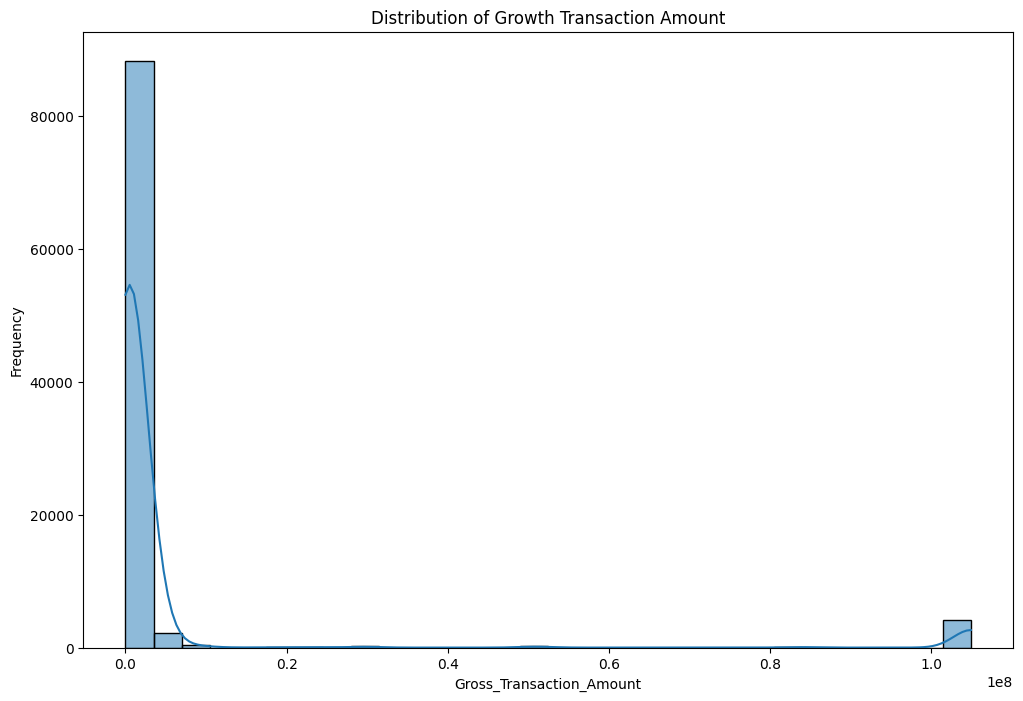

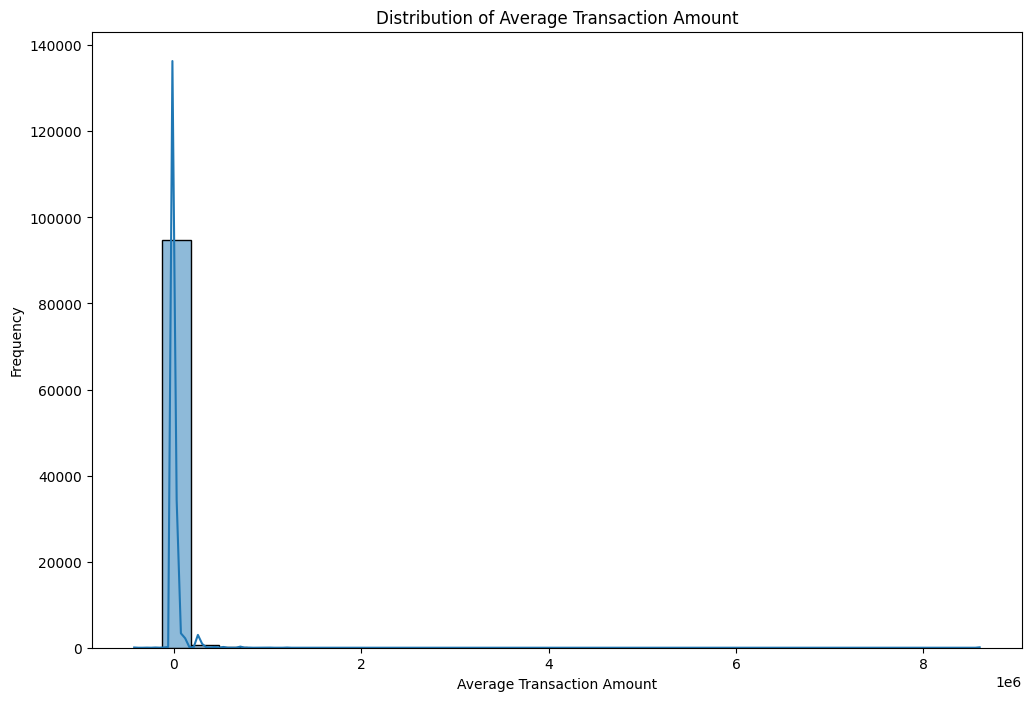

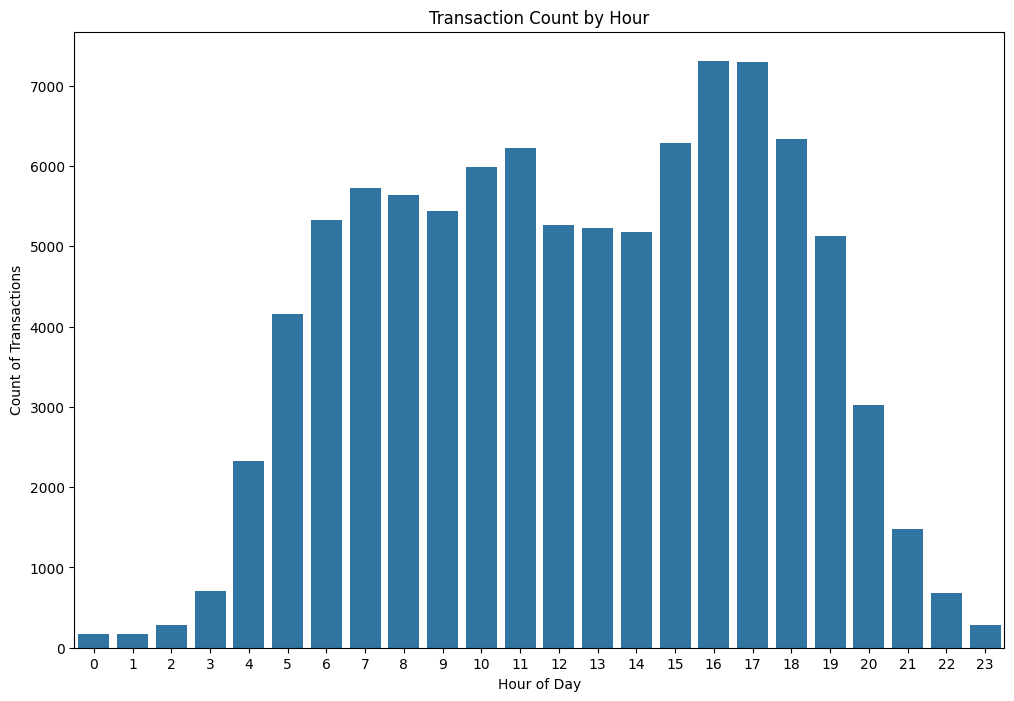

In [3]:

plot_feature_distributions(data)

 # Insights for Transaction Analysis

## Overview
This document synthesizes key insights derived from the analysis of transaction data, focusing on patterns in customer behavior, spending habits, and feature engineering to enhance predictive modeling.

### Transaction Count by Hour

#### Key Observations
1. **Peak Transaction Times**:
   - The analysis reveals significant peaks in transaction counts during late afternoon hours, particularly between 14:00 (2 PM) and 18:00 (6 PM). This indicates that customer activity is highest during these times, likely correlating with post-work engagement.

2. **Even Distribution**:
   - Aside from peak hours, transaction counts remain relatively consistent throughout the day, except for early morning hours, which experience lower activity. This consistent engagement suggests a stable customer base.

3. **Customer Behavior Insights**:
   - The late afternoon peak implies that marketing and support efforts could be strategically concentrated during these hours to maximize engagement.

### Average Transaction Amount Distribution

#### Key Observations
1. **Right-Skewed Distribution**:
   - The average transaction amount is predominantly right-skewed, indicating that most customers engage in low-value transactions. This suggests a need to understand the financial thresholds of the customer base.

2. **Presence of Outliers**:
   - Some customers exhibit substantially higher average transaction amounts, which may indicate high-value transactions or unique spending patterns. These outliers should be further analyzed to identify potential high-value customer segments.

3. **Implications for Analysis**:
   - The skewness and outliers call for careful consideration in modeling approaches. Techniques such as transformations may be necessary to ensure models can effectively handle this data.

### Gross Transaction Amount Distribution

#### Key Observations
1. **Highly Skewed Distribution**:
   - Similar to the average transaction amount, the gross transaction amount also displays a right-skewed distribution, with most transactions being relatively small. This reinforces the need to understand customer engagement levels.

2. **Concentration Around Zero**:
   - A large number of transactions cluster near zero, suggesting that many customers are low-volume users. This insight is crucial for tailoring marketing strategies to encourage higher transaction volumes.

3. **Presence of Outliers**:
   - Notable outliers on the right side indicate a few customers with very high transaction totals. Identifying these customers can help in targeting high-value segments for loyalty programs or tailored offers.


### Conclusion
The combined analysis of transaction patterns and the strategic feature engineering steps taken provide a comprehensive understanding of customer behavior. Insights drawn from transaction counts, spending behaviors, and engagement levels are critical for informing business strategies. By leveraging these findings, businesses can enhance customer experience, optimize marketing efforts, and develop robust models for predicting customer value and risk.

In [ ]:
# Example Usage
filename = "processed_clean_data"  # Naming the file to save
# As we want 'data' is your DataFrame that you want to save 
save_dataframe_to_csv(data, filename)

Data saved to C:\Users\ABC\Desktop\10Acadamy\Week 5\Credit-Risk-Probability-Model\data\processed/processed_clean_data.csv


In [5]:
print(data.dtypes)

TransactionId                           object
BatchId                                 object
AccountId                               object
SubscriptionId                          object
CustomerId                              object
CurrencyCode                            object
CountryCode                              int64
ProviderId                              object
ProductId                               object
ProductCategory                         object
ChannelId                               object
Amount                                 float64
Value                                    int64
TransactionStartTime            datetime64[ns]
PricingStrategy                          int64
FraudResult                              int64
Net_Total_Transaction_Amount           float64
Gross_Transaction_Amount                 int64
Average_Transaction_Amount             float64
Transaction_Count                        int64
Std_Transaction_Amount                 float64
Last_Transact